In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Python for space dummies

- Basics: Lists, for loops, importing modules, getting help
- Two standard library examples: datetime (handling time), pickle (save to disk)
- Numpy (array data type)
- Sympy (symbolic calculation)
- Matplotlib (plotting)
- Scipy (ecosystem of math/science/engineering tools)
- Pandas (data handling)
- Other useful libraries
- Working with CDF files 
- Space / upper atmosphere models: MSIS, HWM, IRI, IGRF, CHAOS, Tsyganenko, AMPS
- Magnetic coordinates
- Pytt/Pyrkeland

## Basics <a name="basics"></a>

Get Python + most relevant modules + package manager from 
https://www.anaconda.com


This document is written with JuPyter notebook.

Usually I write code in Sublime Text (a text editor, https://www.sublimetext.com/3), and run the code using an *ipython* terminal

### Python 2 or 3?

Python 3. 

There are still some (very few) modules that only work in Python 2, but I expect that gradually this will reverse.

The difference between Python 2 and 3 is very small

### Lists<a name="lists"></a>
To get started, I will show some examples with a built-in container type, *list*:


In [3]:
my_list = [2, 3, 7, 11]
print(my_list)

[2, 3, 7, 11]


In [4]:
# They look like vectors/arrays but this is not the case:
print(my_list * 2)

[2, 3, 7, 11, 2, 3, 7, 11]


In [5]:
print(my_list + [100, 101])

[2, 3, 7, 11, 100, 101]


Their elements can be anything:

In [6]:
my_new_list = [1, 'a string', "another string", my_list, print]
print(my_new_list)

[1, 'a string', 'another string', [2, 3, 7, 11], <built-in function print>]


Nice, but pretty useless if we want normal vector/matrix operations. We will fix that with the Numpy module














### For loops <a name="loop"></a>

Example of for loop syntax in Python, in order to illustrate the structuring by indentation  

In [7]:
for item in my_list:
    doubled = item * 2
    print( doubled )

4
6
14
22



### Import modules 

In [8]:
import numpy
print(numpy.sqrt(2))


1.4142135623730951


In [9]:
from numpy import sqrt
print(sqrt(2))

1.4142135623730951


In [10]:
import numpy as np
print(np.sqrt(2))

1.4142135623730951


In [11]:
from numpy import *
print(rad2deg(pi))

180.0


###  How to get help


In [12]:
def my_function(x):
    """ This is the doc-string for my_function
    
    It returns pi 
    ¯\_(ツ)_/¯
    
    """
    return np.pi


In [13]:
help(my_function)

Help on function my_function in module __main__:

my_function(x)
    This is the doc-string for my_function
    
    It returns pi 
    ¯\_(ツ)_/¯



In [14]:
# in ipython, this command prints the docstring:
my_function?

# and this command prints the source code:
my_function??

### Two standard library modules

- datetime  - for time handling <br>
- pickle - for saving to disk

### Datetime
Standard library module for handling time

In [15]:
from datetime import datetime

bcss_kickoff = datetime(2013, 3, 7, 9)
time_since_kickoff = datetime.now() - bcss_kickoff

print('It is %s seconds since BCSS kickoff' % 
      int(time_since_kickoff.total_seconds()))
print('On ' + str(bcss_kickoff.date() + 2 * time_since_kickoff) 
      + ' we will be twice as old as we are now')

It is 206933862 seconds since BCSS kickoff
On 2026-04-18 we will be twice as old as we are now


### Pickle
Standard library module for saving to disk

In [16]:
import pickle

# save a string to a file:
pickle.dump('A string that is saved in a file', open('my_pickle_file.p', 'wb'))

file_content = pickle.load(open('my_pickle_file.p', 'rb'))


In [17]:
print(file_content)

A string that is saved in a file


Pickle is saved in binary format. Be careful, and dont use for things that you will need for a long time

In [18]:
class Magnifier(object):
    def __init__(self, x):
        self.x = x * 2

    def write(self):
        print(self.x)
        
b = Magnifier('hi ')
b.write()

pickle.dump(b, open('magnified_b.p', 'wb'))

hi hi 


In [19]:
class Magnifier(object): 
    def __init__(self, x):
        self.x = x * 4
    
    def write(self):
        print('Magnifier is now TWICE AS GOOD!')
        


In [20]:
b = pickle.load(open('magnified_b.p', 'rb'))
b.write()
print(b.x)

Magnifier is now TWICE AS GOOD!
hi hi 


### Numpy <a name="numpy"></a>

Numpy is not shipped with Python. You need to download and install it (but use anaconda/conda). 

It is completely fundamental to all numerial applications. It is used in all other modules that are discussed here

_Books:_<br>
Guide to Numpy http://web.mit.edu/dvp/Public/numpybook.pdf (Travis Oliphant)<br>
Scipy and Numpy (google it to find a free copy) 

The most important part of Numpy is the array:

In [21]:
import numpy as np

# remember the list:
my_list = [1, 2, 3, 4]
print(my_list * 2)

# convert the list to a Numpy array:
x = np.array(my_list)
print(x*2)

[1, 2, 3, 4, 1, 2, 3, 4]
[2 4 6 8]


In [22]:
# It has a specific data type:
print(x.dtype)

int64


In [23]:
# The data type is automatically changed when needed
print(np.sqrt(x).dtype)

float64


In [24]:
# it is not as flexible as lists (for good reasons)
try:
    x[2] = 'a string'
except:
    print("x[2] = 'a string' did not work\n")
    
print(x)

x[2] = 'a string' did not work

[1 2 3 4]


In [25]:
#It can be multi-dimensional:
x = x.reshape((2, 2))
print(x)

[[1 2]
 [3 4]]


In [26]:
# MULTI-dimensional (adding 3 empty dimensions)
x = x.reshape((2, 2, 1, 1, 1))
print(x.ndim)

5


In [27]:
# the first dimension denotes rows, the second columns:
x_row = x.reshape((1, 4))
print(x_row)

[[1 2 3 4]]


In [28]:
x_column = x.reshape((4, 1))
print(x_column)

[[1]
 [2]
 [3]
 [4]]


In [29]:
# Example of numpy array "broadcasting":
print(x_row + x_column)

[[2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]


In [30]:
# define 3 coordinate arrays (10 elements in each)
x = np.random.random(10)
y = np.random.random(10)
z = np.random.random(10)

# combine to 10 3D vectors:
r = np.vstack((x, y, z))
print(r.shape)


(3, 10)


In [31]:
# print single element of r:
print(r[0, 9])

0.05058729210605517


In [32]:
# print single row:
print(r[0])

[0.36994618 0.24750893 0.45517022 0.19049994 0.42324802 0.72441258
 0.76117343 0.74135384 0.98760753 0.05058729]


In [33]:
# the means of all columns:
print(np.mean(r, axis = 0))

[0.61721662 0.30962646 0.25662166 0.26160755 0.57649343 0.44390821
 0.55366566 0.41762345 0.65676897 0.25930007]


In [34]:
# the lengths of all columns:
print(np.linalg.norm(r, axis = 0) )

[1.11166062 0.54181476 0.53070741 0.4969733  1.08194105 0.84235743
 1.04137992 0.83680219 1.20790406 0.69439441]


In [35]:
# normalize the vectors:
r = r / np.linalg.norm(r, axis = 0)

# check that it worked:
print(np.linalg.norm(r, axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
# Define a rotation matrix (90 degree rotation about z axis):
R = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])

# Apply it to the vectors using the dot function:
r_rotated = R.dot(r)

### Sympy  <a name="sympy"></a>

Sympy is used for symbolic mathematics. 


_Resources:_<br>
Book: Instant Sympy Starter<br>
https://docs.sympy.org

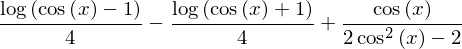

In [37]:
import sympy as sp
sp.init_printing() # this line is to get nicely formatted output

x = sp.symbols('x') 

sp.integrate(1/sp.sin(x)**3)

### Matplotlib <a name = "matplotlib"></a>

Matplotlib is used for plotting.

The only sensible way to learn matplotlib is by examples: <br>
https://matplotlib.org/gallery/index.html <br>
Stackoverflow has ~100 000 posts about matplotlib

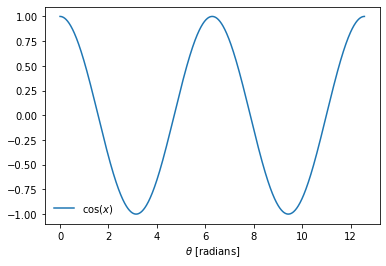

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 4 * np.pi, 1000)
ax.plot(x, np.cos(x), label = r'$\cos(x)$')
ax.legend(frameon = False)
ax.set_xlabel(r'$\theta$ [radians]')
plt.show()


### SciPy <a name="scipy"></a>

Numpy provides the array class, but it is somewhat limited. SciPy is kind of a Numpy expansion, a huge library of scientific software: Optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers, ... 

_Resources:_<br>
Numpy and Scipy (book)<br>
Documentation: https://docs.scipy.org/doc/scipy/reference/ <br>
There are annual SciPy conferences

In [39]:
from scipy.special import sph_harm

# make a grid of colatitude and longitude:
colat, lon = np.meshgrid(np.linspace(0, np.pi, 180), np.linspace(-np.pi , np.pi , 360))

# calculate spherical harmonics of degree 60 and order 40 at grid points: 
y = sph_harm(40, 60, lon, colat) 

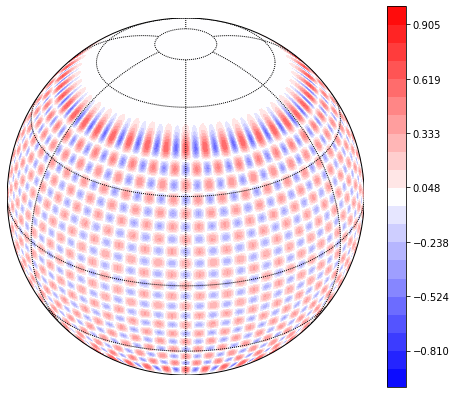

In [40]:
# plot the result on a globe using basemap:
from mpl_toolkits.basemap import Basemap
ax = plt.figure(figsize = (8, 7)).add_subplot(111)

m = Basemap(projection = 'ortho', lon_0 = 0, lat_0 = 30, ax = ax)
c = m.contourf(np.rad2deg(lon), 90 - np.rad2deg(colat), y, cmap = plt.cm.bwr,
               levels = np.linspace(-1, 1, 22), latlon = True)
plt.colorbar(c)
m.drawparallels(np.r_[-60:61:30])
m.drawmeridians(np.r_[-180:180:60])
plt.show()

In [41]:
# Scipy can also be used to read and write Matlab files:
from scipy.io.matlab import loadmat, savemat

# and read IDL files:
from scipy.io.idl import readsav

In [42]:
# Scipy also provides access to BLAS and LAPACK functions:
from scipy.linalg import blas
from scipy.linalg import lapack

# example: calculating c * A.T dot A, when c is a scalar and A is a complex matrix
A = np.random.random((500, 500)) + np.random.random((500, 500)) * 1j
ATA1 = np.triu( 4 * A.T.dot(A)     )          
ATA2 = np.triu( blas.csyrk(4, A, trans = 1) )

# make sure that the results are (almost) equal:
assert np.all(np.isclose( np.abs(ATA1 - ATA2), 0 , atol = 1e-3))

# look at the time difference 
%timeit 4 * A.T.dot(A) 
%timeit blas.csyrk(4, A, trans = 1) 
# (when the number of rows in A increases, the difference gets smaller)

4.31 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.64 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Pandas <a name="pandas"></a>

Pandas is a data analysis library. It is extremely useful for reading, processing, combining data

_Resources:_<br>
Python for Data Analysis (book - I have a copy)<br>
Documentation: https://pandas.pydata.org/pandas-docs/stable/

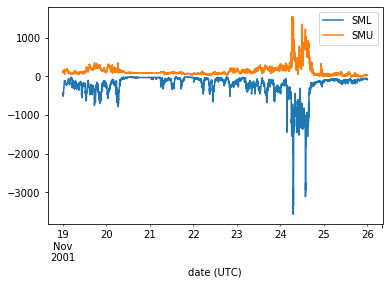

In [43]:
import pandas as pd

# read a file downloaded from supermag, and store it in a pandas DataFrame:
data = pd.read_csv('supermagfile.csv', index_col = 0, parse_dates = True)
data.index.name = 'date (UTC)' 

data[['SML', 'SMU']].plot() # in the background, pandas uses matplotlib to do this

In [44]:
# resample to 1 Hz (from 1 min resolution) and interpolate in one line:
hdsml = data['SML'].resample('1S').interpolate()

# easily combine different time series as long as there are matching indices
smu = data['SMU']

# combine smu (1 min) and hdsml (1 Hz)
ratio = smu / hdsml

# there will be NaNs where hdsml has data and smu does not
print('%.1f%% of the elements in ratio are NaNs (59/60 = %.3f)' %
      ((1 - len(ratio.dropna()) / len(ratio) ) * 100, 59/60))


98.3% of the elements in ratio are NaNs (59/60 = 0.983)


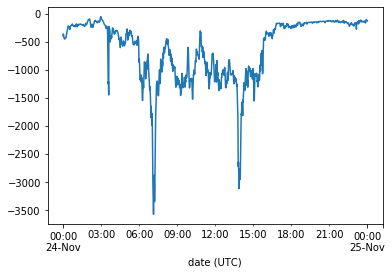

In [45]:
# easily select a subset of one day:
hdsml['2001-11-24'].plot()
plt.show()

(-14.001, 20.0] (351.05, 1544.0]


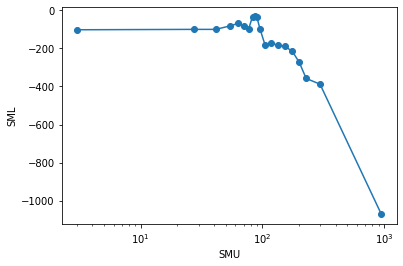

In [46]:
# analyze how SML amd SMU covary:
# pd.qcut(data['SMU'], 20) creates 20 groups / bins, defined by
# SMU quantiles. In each of these bins, we calculate the median of SML
sml_vs_smu = data['SML'].groupby( pd.qcut(data['SMU'], 20) ).median()

# print the first and last elements of the index
print(sml_vs_smu.index[0], sml_vs_smu.index[-1])

# make an array of the mid points of the smu intervals:
smu = [x.mid for x in sml_vs_smu.index]

plt.semilogx(smu, sml_vs_smu.values, marker = 'o')
plt.xlabel('SMU')
plt.ylabel('SML')
plt.show()

### Other useful libraries 

Dask $-$ For big data / parallel computing (https://dask.org/) <br>
scikit-learn / sklearn: https://scikit-learn.org/stable/ $-$ for machine learning ++ <br>
tensorflow $-$ also for machine learning, developed by Google (https://www.tensorflow.org/) <br>
seaborn $-$ for making nice-looking plots quickly, built on matplotlib (https://seaborn.pydata.org/)<br>
PIL $-$ for image processing (Scipy also has many useful image processing tools) <br>
lmfit $-$ For non-linear least squares with constraints (https://lmfit.github.io/lmfit-py/)



### Space physics modules <a name ="space"></a>

There's a ton of modules that have specific uses in space physics. A nice overview is provided by <br>
*Burrell, A. G., Halford, A., Klenzing, J., Stoneback, R. A., Morley, S. K., Annex, A. M., et al. ( 2018). Snakes on a spaceship—An overview of Python in heliophysics. Journal of Geophysical Research: Space Physics, 123, 10,384– 10,402. https://doi.org/10.1029/2018JA025877*

The article also presents a framework for community development, similar to astronomy's AstroPy

I will present examples from different libraries providing access to models originally written in fortran, coordinate conversion, and for working with CDF (Common Data Format) files 

Finally, I will show some examples from Pytt aka Pyrkeland


None of these modules are included with anaconda. You need to download and install, and this can be tricky (especially on Windows)


### CDF (Common Data Format)

File format used extensively in space physics (binary)

*SpacePy*, *pysatCDF*, and *CDFlib* are all able to load CDF files. I recommend CDFlib (https://github.com/MAVENSDC/cdflib). Here is an example:

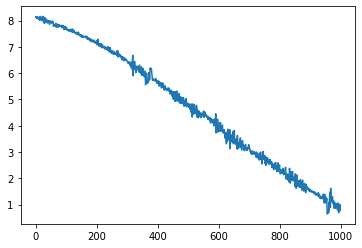

In [47]:
import cdflib

# load a datafile containing 50Hz magnetic field measurements from Swarm
# downloaded from swarm-diss.eo.esa.int
swarm_B_data = cdflib.CDF('./SW_OPER_MAGB_LR_1B_20140424T000000_20140424T235959_0505_MDR_MAG_LR.cdf')
B_vectors = swarm_B_data.varget('B_NEC') # (has shape N x 3)
B_east = B_vectors[:, 1].flatten() # eastward component

# plot the time derivative (first difference) of the last 1000 elements
plt.plot(np.diff( B_east[-1000:] ))


### International Geomagnetic Reference Field (IGRF)
A standard model of Earth's magnetic field. 

I have written a pure Python implementation of this, but it **may** be better to use something more public. The Snakes on a Spaceship paper mentions *pyglow*. It is fairly easy to install if you follow the instructions (https://github.com/timduly4/pyglow)

In [47]:
import pyglow

# Parameters:
colat = 29.776
lon   = 5.33
isv   = 0 # 0 if you want the main field, 1 if you want the secular variation
itype = 2 # 1 if input coords are geodetic, 2 if geocentric
r     = 6362.006324680832
date  = 2019.1

B = pyglow.igrf.igrf12(isv, date, itype, r, colat, lon)
print('north: %.1f nT, east: %.1f, vertical: %.1f nT, total: %.1f nT' % B)

north: 14871.7 nT, east: 313.6, vertical: 48925.3 nT, total: 51136.6 nT


With the igrf12 function the input has to be scalar. To make an array version of this, one can use **np.frompyfunc**, which takes an arbitrary function and returns a function that works well with numpy arrays

### CHAOS model
The DTU main field model. Much more detailed than IGRF. They have recently published Python forward code, called *chaosmagpy*

In [48]:
from chaosmagpy import load_CHAOS_matfile

chaosmodel = load_CHAOS_matfile('./CHAOS-6-x8.mat')

mjd2000 = (date - 2000) * 365.25 
B = chaosmodel(mjd2000, r, colat, lon) # return components are in r, theta, phi directions

print('north: %.1f nT, east: %.1f, vertical: %.1f nT' % (-B[1], B[2], -B[0]))

Computing time-dependent internal field up to degree 20.
Finished in 0.0109999 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.173342 seconds.
Computing GSM field up to degree 2.
Finished in 0.00386203 seconds.
Computing SM field up to degree 2.
Finished in 0.298668 seconds.
north: 14824.6 nT, east: 347.2, vertical: 48976.1 nT


### MSIS / NRLMSISE

Neutral Atmosphere Empirical Model from the surface to lower exosphere - describes neutral densities and temperatures above 100 km

pyglow has a wrapper for this model also. (https://github.com/timduly4/pyglow)

Temperature at 100 km is 1027.3 K


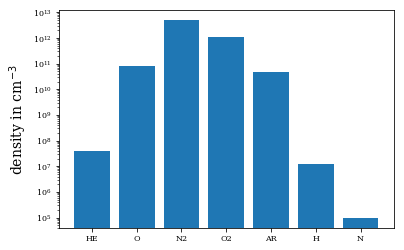

In [49]:
# set some input parameters
iyd = 19170 # YYDDD (year - day_of_year - 19 June 2019 in this case)
sec = 10 * 60**1 # 10 UT in seconds
alt = 100 # altitude in km
lat, lon = 60.389, 5.33
stl = sec/3600 + lon/15 # local apparent solar time (hrs) - approximately
f107a = 70 # 80 day average f107 index centered on the day
f107 = 70  # f107 index yesterday
ap   = [67]*7  # ap index - daily + a set of previous values
mass = 48  # not sure about this, but 48 is supposed to give all outputs

d, t = pyglow.msis.msis00(iyd,sec,alt,lat,lon,stl,f107a,f107,ap,mass)

plt.bar(pyglow.msis.CONSTITUENTS[:-1], d[np.arange(d.size) != 5][:-1])
plt.yscale('log')
plt.ylabel('density in cm$^{-3}$', size = 14)
print('Temperature at %s km is %.1f K' % (alt, t[0]))

### HWM (Horizontal Wind Model)

Empirical model of horizontal neutral winds in the thermosphere. Python wrapper is included in *pyglow*

In [50]:
from pyglow import hwm

# Importing hwm works, but it crashes when I run it

### IRI (International Reference Ionosphere)

Empirical model of the ionosphere. *pyglow* provides a Python wrapper (https://github.com/timduly4/pyglow)

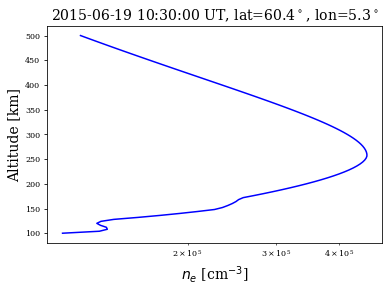

In [51]:
alts = np.linspace(100., 500., 101)
dn = datetime(2015, 6, 19, 10, 30)

ne = []
for alt in alts: # loop through altitudes
    pt = pyglow.Point(dn, lat, lon, alt)
    pt.run_iri() 
    ne.append(pt.ne) # append() is a member function in the list class

plt.semilogx(ne, alts, 'b-') 
plt.xlabel(r'$n_e$ [cm$^{-3}$]', size = 14)
plt.ylabel('Altitude [km]', size = 14)
plt.title(r'%s UT, lat=%3.1f$^\circ$, lon=%3.1f$^\circ$' % (str(dn), lat, lon), size = 14)
plt.show()

### Tsyganenko models

The Tsygnanko models are statistical models of the magnetospheric magnetic field, derived from spacecraft measurements

I've seen several wrappers for this as well. Now I'm trying one called *geopack* (https://github.com/tsssss/geopack)

Load IGRF coefficients ...


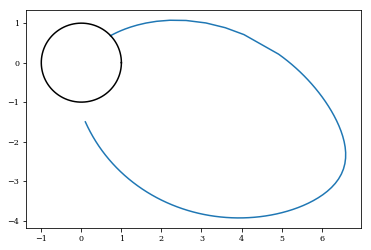

In [52]:
from geopack import geopack
x_gsm,y_gsm,z_gsm = -.1, 0, -1.5

# initialize with universal time (to set dipole tilt I think)
geopack.recalc(10.)

x,y,z,xx,yy,zz = geopack.trace(x_gsm, y_gsm, z_gsm, dir=-1, rlim=100, r0=.99999,
                               parmod=2,exname='t89',inname='igrf',maxloop=10000)
# (the parmod variable could contain external conditions)
plt.plot(-xx, zz)

# plot Eearth
a = np.linspace(0, np.pi * 2, 200)
plt.plot(np.cos(a), np.sin(a), color = 'black')
plt.show()

### AMPS
The Average Magnetic field and Polar current System model

Python forward code: *pyAMPS* (https://github.com/klaundal/pyAMPS)

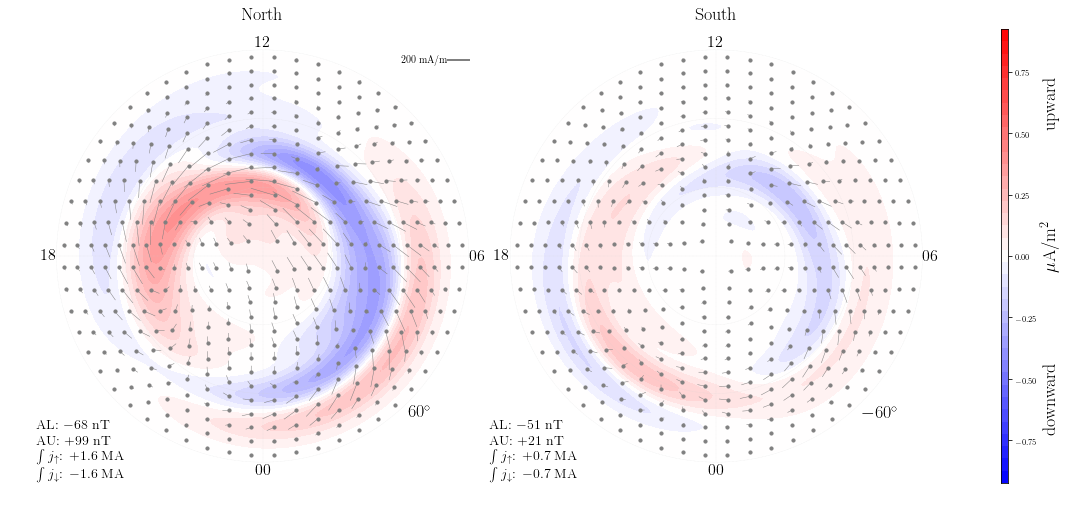

In [53]:
import pyamps
m = pyamps.AMPS(300, 5, -4, 23, 100) # initialize with SW speed, By, Bz, tilt, F107
m.plot_currents()

### Magnetic coordinates

I will demonstrate apexpy and aacgmv2. Both Apex and AACGM coordinates involve tracing of magnetic field lines in the IGRF model, which is computationally heavy and not something you should implement yourself (although you *could*, using the geopack library and Runge-Kutta integrators from Scipy). apexpy is a wrapper for Fortran code written by Emmert et al. (2010), and aacgmv2 is a wrapper for C code written by Simon Shepherd (2014). 


In [54]:
import apexpy

now = datetime.utcnow()
a = apexpy.Apex(date = now, refh = 110)
mlat, mlon = a.geo2apex(lat, lon, 0)
print('The current mlat/MLT in Bergen is %.1f degrees / %.1f' % 
      (mlat, a.mlon2mlt(mlon, now)))

# calcualte magnetic circle of latitude which goes through Bergen
mlons = np.linspace(-180, 180, 360)
glat, glon, error = a.apex2geo(mlat, mlons, 0)

The current mlat/MLT in Bergen is 57.0 degrees / 8.8


In [55]:
import aacgmv2

mlat_aacgm, mlon_aacgm = aacgmv2.convert(lat, lon, 0, now, a2g = False)
glat_aacgm, glon_aacgm = aacgmv2.convert(mlat_aacgm, mlons, 0, now, a2g = True)

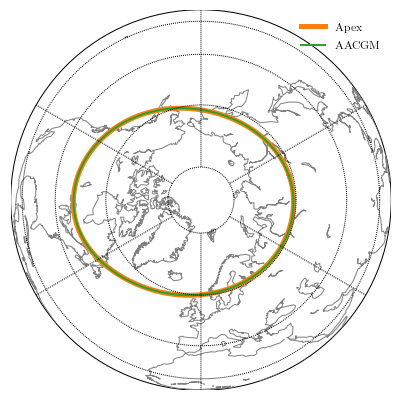

In [56]:
# plot the latitude circles on a map
fig = plt.figure(figsize = (8, 7))
ax = fig.add_subplot(111)
m = Basemap(projection = 'ortho', lon_0 = 0, lat_0 = 90, ax = ax)
m.plot(glon, glat, latlon = True, linewidth = 5, color = 'C1', label = 'Apex')
m.plot(glon_aacgm, glat_aacgm, latlon = True, linewidth = 2, color = 'C2', label = 'AACGM')
m.drawparallels([20, 40, 60, 80])
m.drawmeridians(np.r_[0:360:60])
m.drawcoastlines(color = 'grey')

ax.legend(frameon = False, fontsize = 12)
plt.show()

### Other useful space physics Python projects

- DaViTpy: **Extensive** module for working with SuperDARN (does not support Python 3) (https://github.com/vtsuperdarn/davitpy)
- pyEphem: For calculating position of astronomical bodies
- SpacePy: Extensive library which includes CDF handling, coordinate conversion, and tools for working with Space Weather Modeling Framework output
- OvationPyme: Python translation of Ovation Prime (I have not been able to run this)
- MadrigalWeb: Access data from Madrigal database
- viresclient: Download Swarm data and evaluate models (including CHAOS, IGRF,  ...)


### Pytt / Pyrkeland / dipole

Some examples from my own code 
- Pytt (misc): https://github.com/klaundal/pytt (private repository, but I will give you access if you want)
- dipole: for (extremely fast) calculation of dipole tilt angle


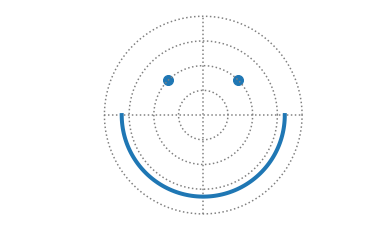

In [57]:
# plotting on MLT mlat grid:
from pytt.plotting import polarsubplot

ax = plt.figure().add_subplot(111)
pax = polarsubplot.Polarsubplot(ax, linestyle = ':', color = 'grey')
mlat, mlt = np.ones(100) * 57, np.linspace(18, 24 + 6, 100)
pax.plot(mlat, mlt, linewidth = 4)
pax.scatter([70, 70], [15, 9], marker = 'o', s = 100)
plt.show()

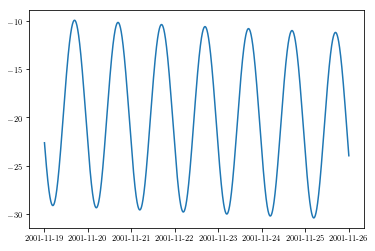

In [58]:
# dipole tilt angle 
from dipole import dipole_tilt

# calculate tilt angle for each time in the SuperMAG 
# file that was loaded above (called data)
tilt = dipole_tilt(data.index)
plt.plot(data.index, tilt)
plt.show()

In [59]:
# conversion between geodetic and geocentric coordinates
# geodetic takes into account ellipsoid - this is what is normally used in maps
from pytt.earth.geodesy import geod2geoc

theta, r, south, radial = geod2geoc(lat, 0, 0, -1) 
print('geocentric latitude: %.1f, geodetic latitude: %.1f' % (90 - theta, lat))
print('geocentric radius: %.1f km, compared to mean Earth radius %.1f km' % (r, 6371.2))
print('An upward unit vector has radial component %.7f and southward component %.7f in a geocentric system' % (radial, south))


geocentric latitude: 60.2, geodetic latitude: 60.4
geocentric radius: 6362.0 km, compared to mean Earth radius 6371.2 km
An upward unit vector has radial component 0.9999958 and southward component -0.0028904 in a geocentric system


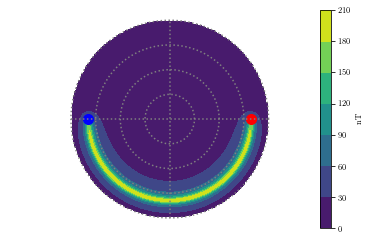

In [60]:
# use biot savart to evaluate field of line current on sphere
from pytt.mag.biot_savart import biot_savart
RE = 6371.2 * 1e3
current_height = RE + 100 * 1e3
amplitude = 100 * 1e3 # Amperes

# make a grid
mlatxx, mltxx = np.meshgrid(np.linspace(50, 90, 70), np.linspace(0, 24, 100))

B = biot_savart(mlat, mlt, mlatxx, mltxx, amplitude, RB = RE, RI = current_height)
B = np.linalg.norm(B, axis = 0)

ax = plt.figure().add_subplot(111)
pax = polarsubplot.Polarsubplot(ax, linestyle = ':', color = 'grey')
c = pax.contourf(mlatxx, mltxx, B * 1e9)
plt.colorbar(c, label = 'nT')
pax.scatter(mlat[0] , mlt[0], marker = 'o', s = 100, c = 'blue')
pax.scatter(mlat[-1], mlt[-1], marker = 'o', s = 100, c = 'red')
plt.show()

In [61]:
import antigravity

<img src="files/python.png">

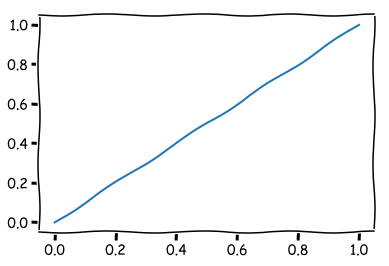

In [62]:
plt.rcParams['text.usetex'] = False
plt.xkcd()
plt.plot([0, 1], [0, 1])
plt.show()


<img src="files/xkcd.png">

# The end

Send me an email to get access to pytt and this notebook on github